<a href="https://colab.research.google.com/github/andresfelipebarragannino6-ai/Clasificaci-n-aprendiendo-a-clasificar-datos-con-Machine-Learning/blob/main/Clasificacion_primeros_pasos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación: Primeros pasos**

En este proyecto, analizaremos datos de una campaña de marketing para la adhesión a inversiones. El objetivo es utilizar la información de los datos para predecir si los clientes de un banco invertirán su dinero o no.  

Esta predicción se realizará mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

# 1. Análisis exploratorio

## Realizando la lectura de los datos

Podemos leer los datos utilizando la biblioteca `pandas`. Por esta razón, importaremos la biblioteca con el comando `import pandas as pd`.  

Dado que el archivo de datos está en formato *csv*, realizaremos la lectura con la función [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('/content/marketing_inversiones.csv')

In [3]:
datos.head()

edad    estado_civil escolaridad default  saldo prestatario  \
0    45      casado (a)    superior      no    242          no   
1    42      casado (a)  secundaria      no   1289          no   
2    23     soltero (a)    superior      no    363          no   
3    58  divorciado (a)    superior      no   1382          no   
4    50      casado (a)  secundaria      no   3357          no   

   ultimo_contacto  ct_contactos adherencia_inversion  
0              587             1                   si  
1              250             4                   si  
2               16            18                   no  
3              700             1                   si  
4              239             4                   si

Para crear modelos de clasificación, necesitamos utilizar datos de calidad, sin inconsistencias y sin datos faltantes. Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  1268 non-null   int64 
 1   estado_civil          1268 non-null   object
 2   escolaridad           1268 non-null   object
 3   default               1268 non-null   object
 4   saldo                 1268 non-null   int64 
 5   prestatario           1268 non-null   object
 6   ultimo_contacto       1268 non-null   int64 
 7   ct_contactos          1268 non-null   int64 
 8   adherencia_inversion  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando los datos

Una etapa muy importante en proyectos de *machine learning* es la exploración y comprensión de los datos, conocida como **análisis exploratorio**. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

### Variables categóricas

In [5]:
import plotly.express as px

In [6]:
px.histogram(datos,x='adherencia_inversion',text_auto=True)

In [7]:
px.histogram(datos,x='estado_civil',text_auto=True,color='adherencia_inversion')

**Barras agrupadas**

In [8]:
px.histogram(datos,x='estado_civil',text_auto=True,color='adherencia_inversion',barmode='group')

In [9]:
px.histogram(datos,x='escolaridad',text_auto=True,color='adherencia_inversion',barmode='group')

In [10]:
px.histogram(datos,x='default',text_auto=True,color='adherencia_inversion',barmode='group')

In [11]:
px.histogram(datos,x='prestatario',text_auto=True,color='adherencia_inversion',barmode='group')

### Variables numéricas

In [12]:
px.box(datos,x='edad',color='adherencia_inversion')

In [13]:
px.box(datos,x='saldo',color='adherencia_inversion')

In [14]:
px.box(datos,x='ultimo_contacto',color='adherencia_inversion')

In [15]:
px.box(datos,x='ct_contactos',color='adherencia_inversion')

##**Desafío: hora de la práctica**

1 - La primera etapa en un proyecto de Machine Learning es la obtención de datos. A partir de esta obtención, podemos leer los datos para construir un modelo. Como tarea inicial, realiza la lectura de la base de datos y verifica la presencia de datos nulos. Además, elimina la columna 'id_cliente', ya que este tipo de información única para cada fila no es útil para su uso en modelos de machine learning.

In [16]:
datos_desafio = pd.read_csv('/content/churn.csv')

In [17]:
datos_desafio.head()

id_cliente  score_credito     pais sexo_biologico  edad  años_de_cliente  \
0    15634602            619  Francia          Mujer    42                2   
1    15647311            608   España          Mujer    41                1   
2    15619304            502  Francia          Mujer    42                8   
3    15701354            699  Francia          Mujer    39                1   
4    15737888            850   España          Mujer    43                2   

       saldo  servicios_adquiridos  tiene_tarjeta_credito  miembro_activo  \
0       0.00                     1                      1               1   
1   83807.86                     1                      0               1   
2  159660.80                     3                      1               0   
3       0.00                     2                      0               0   
4  125510.82                     1                      1               1   

   salario_estimado  churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4          79084.10      0

In [18]:
datos_desafio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             10000 non-null  int64  
 1   score_credito          10000 non-null  int64  
 2   pais                   10000 non-null  object 
 3   sexo_biologico         10000 non-null  object 
 4   edad                   10000 non-null  int64  
 5   años_de_cliente        10000 non-null  int64  
 6   saldo                  10000 non-null  float64
 7   servicios_adquiridos   10000 non-null  int64  
 8   tiene_tarjeta_credito  10000 non-null  int64  
 9   miembro_activo         10000 non-null  int64  
 10  salario_estimado       10000 non-null  float64
 11  churn                  10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [19]:
datos_desafio = datos_desafio.drop(columns=['id_cliente'])

In [20]:
datos_desafio.head()

score_credito     pais sexo_biologico  edad  años_de_cliente      saldo  \
0            619  Francia          Mujer    42                2       0.00   
1            608   España          Mujer    41                1   83807.86   
2            502  Francia          Mujer    42                8  159660.80   
3            699  Francia          Mujer    39                1       0.00   
4            850   España          Mujer    43                2  125510.82   

   servicios_adquiridos  tiene_tarjeta_credito  miembro_activo  \
0                     1                      1               1   
1                     1                      0               1   
2                     3                      1               0   
3                     2                      0               0   
4                     1                      1               1   

   salario_estimado  churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4          79084.10      0

2 - Después de leer los datos, es importante conocer los datos, revisando inconsistencias y entendiendo el comportamiento de cada una de las columnas. En esta tarea, realiza un análisis exploratorio utilizando gráficos para las variables categóricas de la base de datos, incluyendo la variable objetivo churn. Para estas variables, se pueden utilizar gráficos de barras para contar las categorías y hacer un agrupamiento por colores de acuerdo con las categorías de la variable objetivo.

In [21]:
px.histogram(datos_desafio, x='churn', text_auto=True)

In [22]:
px.histogram(datos_desafio, x='pais', color='churn', text_auto=True, barmode='group')

In [23]:
px.histogram(datos_desafio, x='sexo_biologico', color='churn', text_auto=True, barmode='group')

In [24]:
px.histogram(datos_desafio, x='tiene_tarjeta_credito', color='churn', text_auto=True, barmode='group')

In [25]:
px.histogram(datos_desafio,x='miembro_activo',color='churn',text_auto=True,barmode='group')

3 - Después de explorar las variables categóricas, es el turno de las variables numéricas. Construye gráficos de distribución como boxplots o histogramas para analizar el comportamiento de los valores numéricos y verificar si hay valores inconsistentes.

In [26]:
px.box(datos_desafio,x='score_credito',color='churn')

In [27]:
px.box(datos_desafio,x='edad',color='churn')

In [28]:
px.box(datos_desafio,x='años_de_cliente',color='churn')

In [29]:
px.box(datos_desafio,x='saldo',color='churn')

In [30]:
px.box(datos_desafio,x='servicios_adquiridos',color='churn')

In [31]:
px.box(datos_desafio,x='salario_estimado',color='churn')

# 2. Tranformación de los datos

## Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir, mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [32]:
datos

edad    estado_civil escolaridad default  saldo prestatario  \
0       45      casado (a)    superior      no    242          no   
1       42      casado (a)  secundaria      no   1289          no   
2       23     soltero (a)    superior      no    363          no   
3       58  divorciado (a)    superior      no   1382          no   
4       50      casado (a)  secundaria      no   3357          no   
...    ...             ...         ...     ...    ...         ...   
1263    52     soltero (a)    superior      no     83          no   
1264    35     soltero (a)    superior      no   5958          no   
1265    30     soltero (a)    superior      no   -477          si   
1266    42      casado (a)    superior      no   2187          no   
1267    29     soltero (a)    superior      no     19          no   

      ultimo_contacto  ct_contactos adherencia_inversion  
0                 587             1                   si  
1                 250             4                   si  
2                  16            18                   no  
3                 700             1                   si  
4                 239             4                   si  
...               ...           ...                  ...  
1263             1223             6                   si  
1264              215             1                   si  
1265             1532             2                   si  
1266              525             3                   si  
1267              110             2                   si  

[1268 rows x 9 columns]

In [33]:
X = datos.drop('adherencia_inversion',axis=1)
y = datos['adherencia_inversion']

In [34]:
X

edad    estado_civil escolaridad default  saldo prestatario  \
0       45      casado (a)    superior      no    242          no   
1       42      casado (a)  secundaria      no   1289          no   
2       23     soltero (a)    superior      no    363          no   
3       58  divorciado (a)    superior      no   1382          no   
4       50      casado (a)  secundaria      no   3357          no   
...    ...             ...         ...     ...    ...         ...   
1263    52     soltero (a)    superior      no     83          no   
1264    35     soltero (a)    superior      no   5958          no   
1265    30     soltero (a)    superior      no   -477          si   
1266    42      casado (a)    superior      no   2187          no   
1267    29     soltero (a)    superior      no     19          no   

      ultimo_contacto  ct_contactos  
0                 587             1  
1                 250             4  
2                  16            18  
3                 700             1  
4                 239             4  
...               ...           ...  
1263             1223             6  
1264              215             1  
1265             1532             2  
1266              525             3  
1267              110             2  

[1268 rows x 8 columns]

In [35]:
y # Serie de pandas

0       si
1       si
2       no
3       si
4       si
        ..
1263    si
1264    si
1265    si
1266    si
1267    si
Name: adherencia_inversion, Length: 1268, dtype: object

In [36]:
type(y)

pandas.core.series.Series

## Transformando las variables explicativas

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

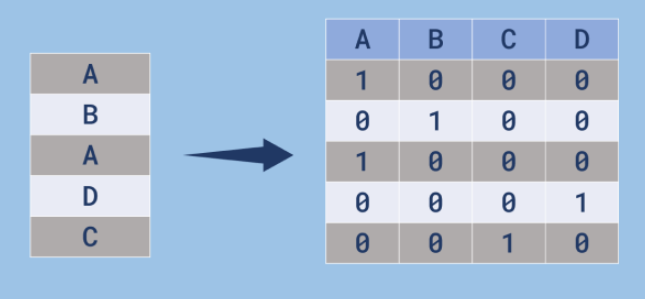

In [37]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [38]:
columnas = X.columns

In [39]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),['estado_civil','escolaridad','default','prestatario']),remainder='passthrough',sparse_threshold=0,force_int_remainder_cols=False)

In [40]:
X = one_hot.fit_transform(X)

In [41]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_soltero (a)',
       'onehotencoder__escolaridad_primaria',
       'onehotencoder__escolaridad_secundaria',
       'onehotencoder__escolaridad_superior', 'onehotencoder__default_si',
       'onehotencoder__prestatario_si', 'remainder__edad',
       'remainder__saldo', 'remainder__ultimo_contacto',
       'remainder__ct_contactos'], dtype=object)

In [42]:
X

array([[ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.420e+02,  5.870e+02,
         1.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.289e+03,  2.500e+02,
         4.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  3.630e+02,  1.600e+01,
         1.800e+01],
       ...,
       [ 0.000e+00,  0.000e+00,  1.000e+00, ..., -4.770e+02,  1.532e+03,
         2.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.187e+03,  5.250e+02,
         3.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  1.900e+01,  1.100e+02,
         2.000e+00]])

In [43]:
pd.DataFrame(X,columns=one_hot.get_feature_names_out(columnas))

onehotencoder__estado_civil_casado (a)  \
0                                        1.0   
1                                        1.0   
2                                        0.0   
3                                        0.0   
4                                        1.0   
...                                      ...   
1263                                     0.0   
1264                                     0.0   
1265                                     0.0   
1266                                     1.0   
1267                                     0.0   

      onehotencoder__estado_civil_divorciado (a)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            1.0   
4                                            0.0   
...                                          ...   
1263                                         0.0   
1264                                         0.0   
1265                                         0.0   
1266                                         0.0   
1267                                         0.0   

      onehotencoder__estado_civil_soltero (a)  \
0                                         0.0   
1                                         0.0   
2                                         1.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
1263                                      1.0   
1264                                      1.0   
1265                                      1.0   
1266                                      0.0   
1267                                      1.0   

      onehotencoder__escolaridad_primaria  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
1263                                  0.0   
1264                                  0.0   
1265                                  0.0   
1266                                  0.0   
1267                                  0.0   

      onehotencoder__escolaridad_secundaria  \
0                                       0.0   
1                                       1.0   
2                                       0.0   
3                                       0.0   
4                                       1.0   
...                                     ...   
1263                                    0.0   
1264                                    0.0   
1265                                    0.0   
1266                                    0.0   
1267                                    0.0   

      onehotencoder__escolaridad_superior  onehotencoder__default_si  \
0                                     1.0                        0.0   
1                                     0.0                        0.0   
2                                     1.0                        0.0   
3                                     1.0                        0.0   
4                                     0.0                        0.0   
...                                   ...                        ...   
1263                                  1.0                        0.0   
1264                                  1.0                        0.0   
1265                                  1.0                        0.0   
1266                                  1.0                        0.0   
1267                                  1.0                        0.0   

      onehotencoder__prestatario_si  remainder__edad  remainder__saldo  \
0                               0.0             45.0             242.0   
1                               0.0             42.0            1289.0   
2                     

## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
label_encoder = LabelEncoder()

In [46]:
y = label_encoder.fit_transform(y)

In [47]:
y

array([1, 1, 0, ..., 1, 1, 1])

##**Desafío: hora de la práctica**

1.Para utilizar los datos en los algoritmos de Machine Learning, necesitamos informar cuáles son las variables explicativas y cuál es la variable objetivo. En este desafío, realiza la separación de la base de datos de churn entre las variables explicativas, almacenando en una variable x y la variable objetivo en y.

In [48]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer

datos_desafio = pd.read_csv('churn.csv')

X2 = datos_desafio.drop(columns=['id_cliente', 'churn'])

y2 = datos_desafio['churn']

2.Las variables categóricas que están en formato de texto no pueden ser utilizadas directamente en los modelos de Machine Learning. En este desafío, realiza la transformación de las variables categóricas al formato numérico utilizando el OneHotEncoder, utilizando el parámetro drop='if_binary' si alguna variable tiene solo 2 categorías.

In [49]:
X2 = datos_desafio.drop(columns=['id_cliente', 'churn'])

columnas_categoricas2 = ['pais', 'sexo_biologico']

one_hot2 = OneHotEncoder(drop='if_binary', sparse_output=False)

transformador2 = make_column_transformer(
    (one_hot2, columnas_categoricas2),
    remainder='passthrough'
)

X_transformado2 = transformador2.fit_transform(X2)

X_columnas2 = transformador2.get_feature_names_out()
X2 = pd.DataFrame(X_transformado2, columns=X_columnas2)

3.La variable objetivo, como es de tipo categórica, también necesita pasar por un tratamiento similar al de las variables explicativas categóricas para que pueda ser utilizada en los algoritmos. En esta tarea, utiliza el método LabelEncoder para realizar la transformación de la variable churn.

In [50]:
label_enc2 = LabelEncoder()
y2 = label_enc2.fit_transform(datos_desafio['churn'])

print("Primeras filas de X procesada:")
print(X2.head())

Primeras filas de X procesada:
   onehotencoder__pais_Alemania  onehotencoder__pais_España  \
0                           0.0                         0.0   
1                           0.0                         1.0   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           0.0                         1.0   

   onehotencoder__pais_Francia  onehotencoder__sexo_biologico_Mujer  \
0                          1.0                                  1.0   
1                          0.0                                  1.0   
2                          1.0                                  1.0   
3                          1.0                                  1.0   
4                          0.0                                  1.0   

   remainder__score_credito  remainder__edad  remainder__años_de_cliente  \
0                     619.0             42.0                         2.0   
1          

# 3 Ajustando modelos

## Dividiendo los datos entre entrenamiento y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, necesitamos hacer una separación de los datos entre entrenamiento y prueba. Los datos de **entrenamiento** se utilizan para ajustar el modelo, mientras que los datos de **prueba** sirven para verificar el aprendizaje del modelo en datos que no fueron utilizados en el momento del ajuste.

<a href="https://ibb.co/2749Chh3"><img src="https://i.ibb.co/Y7sC1QQB/train-test.png" alt="train-test" border="0"></a>

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=5)

## Modelo de referencia - Baseline

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [53]:
from sklearn.dummy import DummyClassifier

In [54]:
dummy = DummyClassifier()
dummy.fit(X_train,y_train)

dummy.score(X_test,y_test)

0.6025236593059937

## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train,y_train)

DecisionTreeClassifier(random_state=5)

In [57]:
modelo_arbol.score(X_test,y_test)

0.6656151419558359

In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

```python
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']
```

In [59]:
feature_names = one_hot.get_feature_names_out()
print(feature_names)

# Si quieres los nombres como lista de Python
columnas_transformadas_lista = feature_names.tolist()
print(columnas_transformadas_lista)

['onehotencoder__estado_civil_casado (a)'
 'onehotencoder__estado_civil_divorciado (a)'
 'onehotencoder__estado_civil_soltero (a)'
 'onehotencoder__escolaridad_primaria'
 'onehotencoder__escolaridad_secundaria'
 'onehotencoder__escolaridad_superior' 'onehotencoder__default_si'
 'onehotencoder__prestatario_si' 'remainder__edad' 'remainder__saldo'
 'remainder__ultimo_contacto' 'remainder__ct_contactos']
['onehotencoder__estado_civil_casado (a)', 'onehotencoder__estado_civil_divorciado (a)', 'onehotencoder__estado_civil_soltero (a)', 'onehotencoder__escolaridad_primaria', 'onehotencoder__escolaridad_secundaria', 'onehotencoder__escolaridad_superior', 'onehotencoder__default_si', 'onehotencoder__prestatario_si', 'remainder__edad', 'remainder__saldo', 'remainder__ultimo_contacto', 'remainder__ct_contactos']


In [60]:
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']

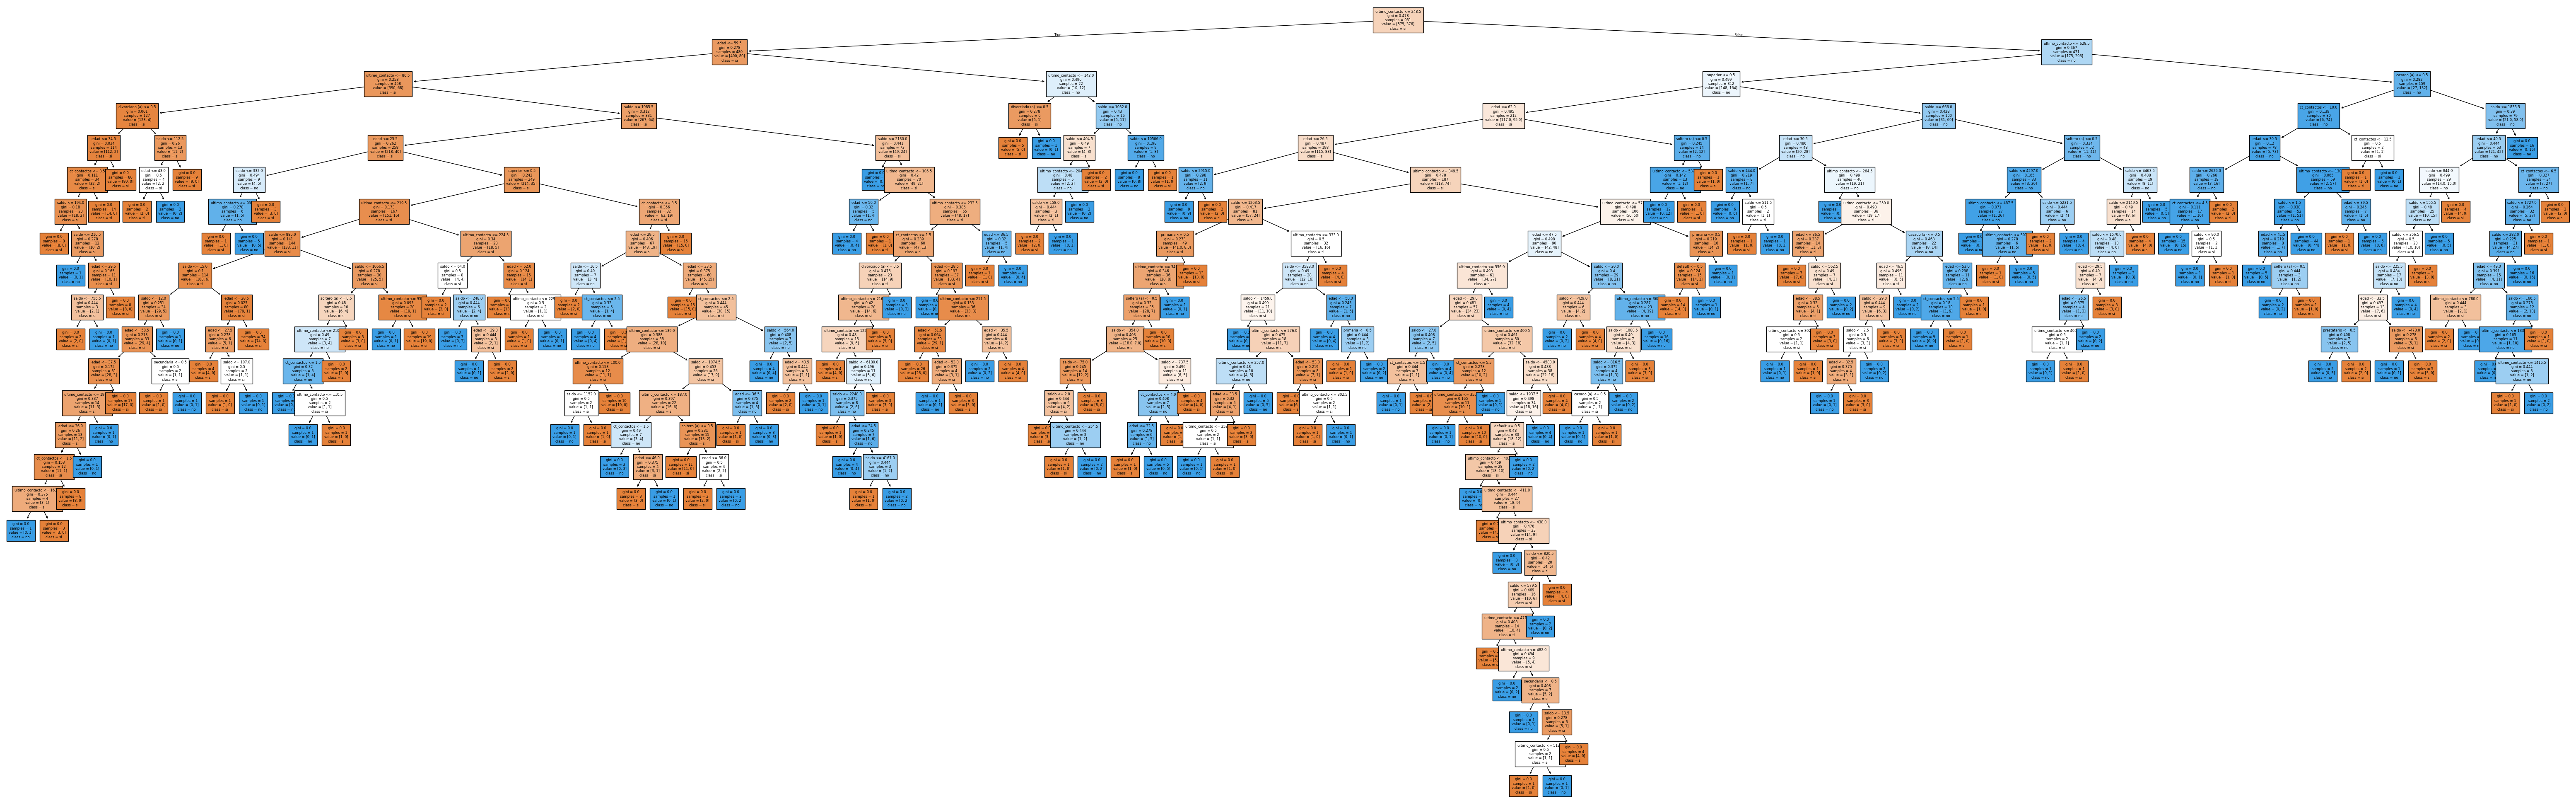

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(80,25))
plot_tree(modelo_arbol,filled=True,class_names=['si','no'],fontsize=6,feature_names=valores_columnas);

In [62]:
modelo_arbol.score(X_train,y_train)

1.0

In [63]:
modelo_arbol = DecisionTreeClassifier(max_depth=4,random_state=5)
modelo_arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [64]:
modelo_arbol.score(X_test,y_test)

0.722397476340694

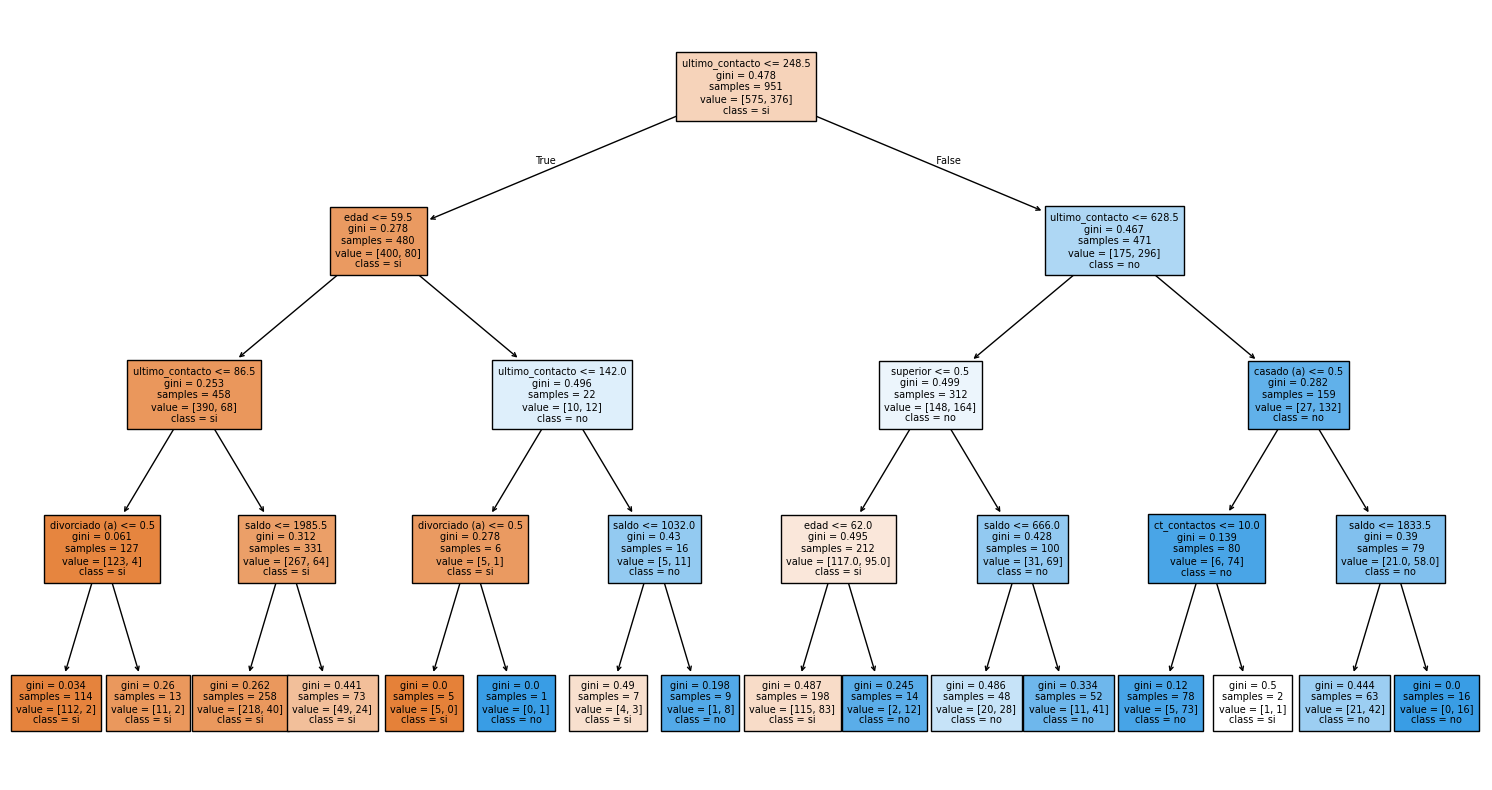

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(19,10))
plot_tree(modelo_arbol,filled=True,class_names=['si','no'],fontsize=7,feature_names=valores_columnas);

In [66]:
modelo_arbol.score(X_train,y_train)

0.7739221871713985

##**Desafío: hora de la práctica**

1.La separación de los datos entre conjunto de entrenamiento y prueba es esencial para comprender si un modelo está logrando aprender los patrones y generalizar a nuevos datos. En esta tarea, realiza la división de la base de datos entre entrenamiento y prueba de forma estratificada.

In [67]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, stratify=y2,random_state=5)

In [68]:
dummy2 = DummyClassifier()
dummy2.fit(X_train,y_train)

dummy2.score(X_test2,y_test2)

0.7964

2.Un modelo base es muy importante para definir un criterio de comparación para modelos más complejos. En esta etapa, crea un modelo base con el DummyClassifier y encuentra la tasa de acierto con el método score.

In [69]:
modelo_arbol2 = DecisionTreeClassifier(random_state=6)
modelo_arbol2.fit(X_train2,y_train2)

DecisionTreeClassifier(random_state=6)

In [70]:
modelo_arbol2.score(X_test2,y_test2)

0.8016

In [71]:
# Ver los nombres de las columnas del DataFrame
print(X2.columns)

# Si quieres los nombres como lista de Python
columnas2 = X2.columns.tolist()
print(columnas2)

Index(['onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia', 'onehotencoder__sexo_biologico_Mujer',
       'remainder__score_credito', 'remainder__edad',
       'remainder__años_de_cliente', 'remainder__saldo',
       'remainder__servicios_adquiridos', 'remainder__tiene_tarjeta_credito',
       'remainder__miembro_activo', 'remainder__salario_estimado'],
      dtype='object')
['onehotencoder__pais_Alemania', 'onehotencoder__pais_España', 'onehotencoder__pais_Francia', 'onehotencoder__sexo_biologico_Mujer', 'remainder__score_credito', 'remainder__edad', 'remainder__años_de_cliente', 'remainder__saldo', 'remainder__servicios_adquiridos', 'remainder__tiene_tarjeta_credito', 'remainder__miembro_activo', 'remainder__salario_estimado']


In [72]:
valores_columnas2 = ['Alemania',
                    'España',
                    'Francia',
                    'Mujer',
                    'score_credito',
                    'edad',
                    'años_de_cliente',
                    'saldo',
                    'servicios_adquiridos',
                    'tiene_tarjeta_credito',
                    'miembro_activo',
                    'salario_estimado'
]

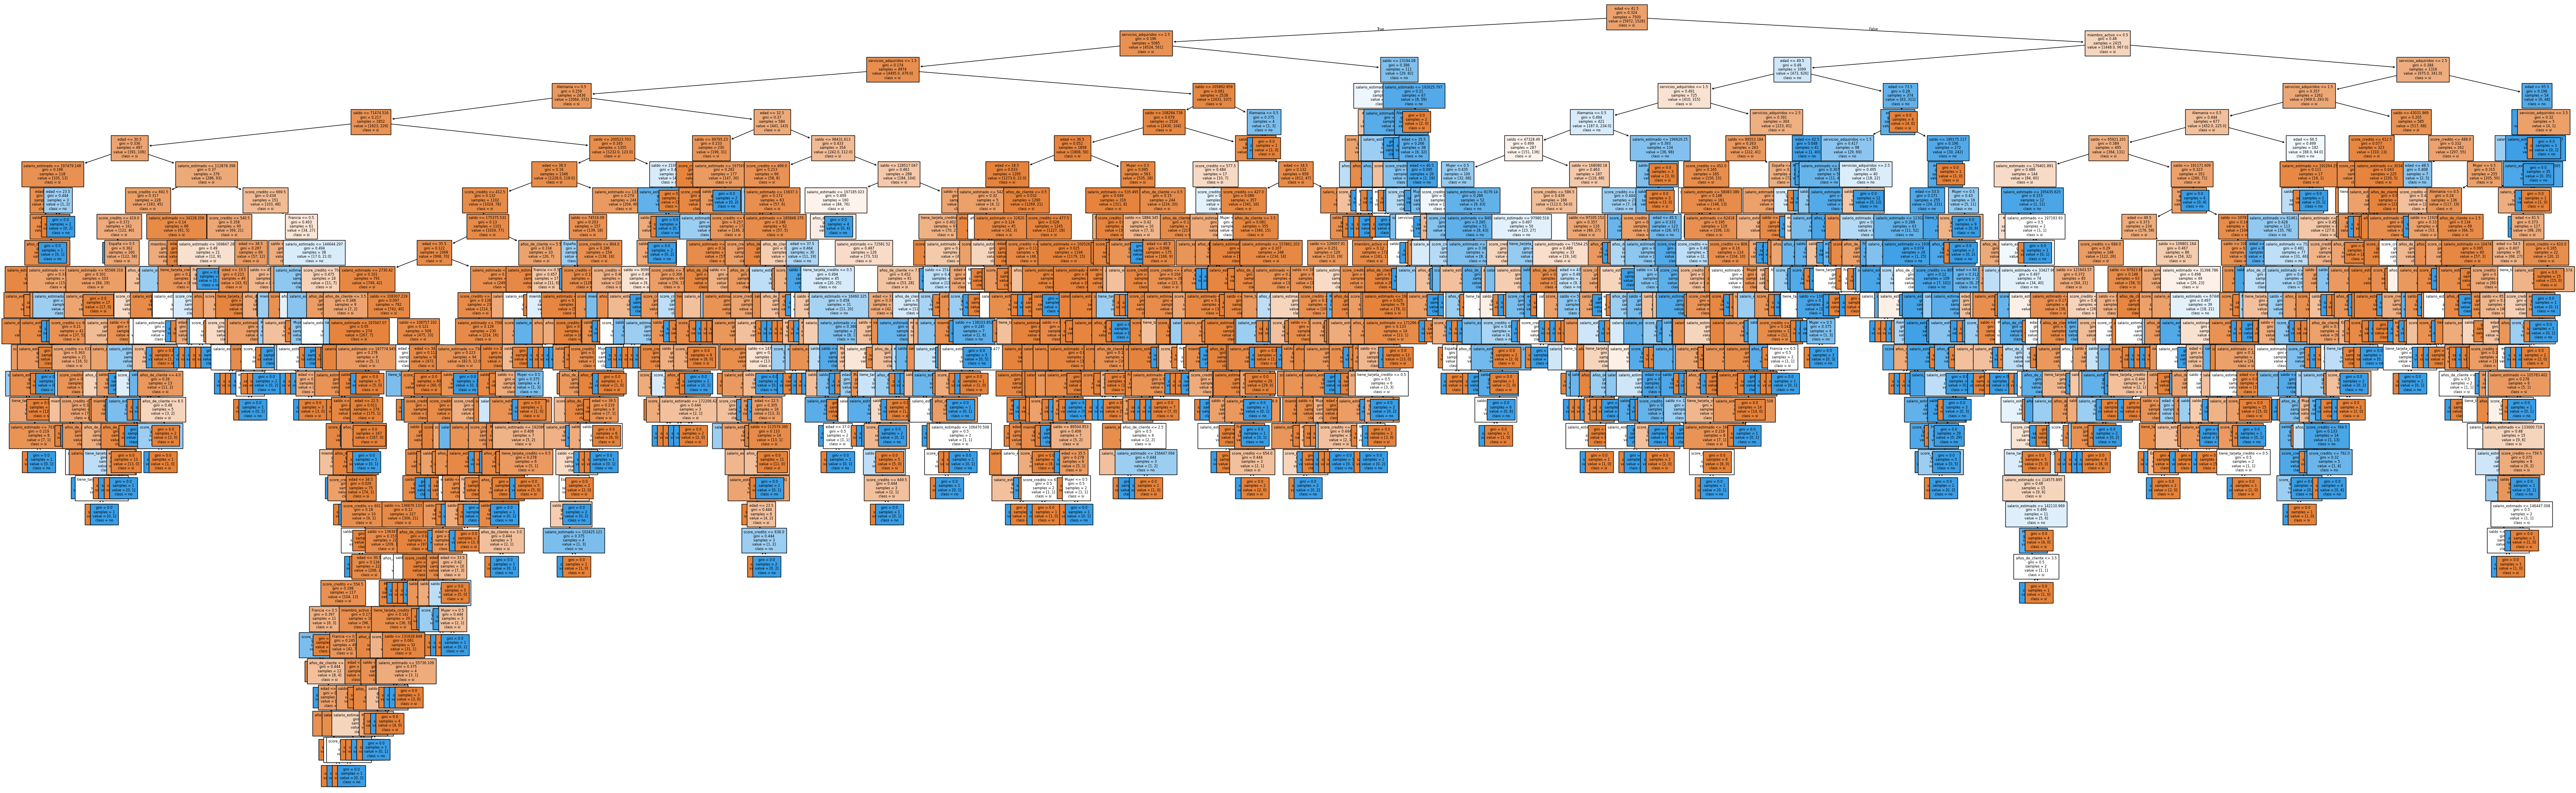

In [73]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol2,filled=True,class_names=['si','no'],fontsize=6,feature_names=valores_columnas2);

In [74]:
modelo_arbol2.score(X_train2,y_train2)

1.0

3.El árbol de decisión es un algoritmo que realiza las clasificaciones a partir de decisiones simples tomadas a partir de los datos. Debemos tener cierto cuidado de no utilizar una profundidad muy grande, porque esto puede provocar un sobreajuste del modelo a los datos de entrenamiento. En este desafío, crea un modelo de árbol de decisión con el parámetro max_depth=4, evalúa el desempeño del modelo en los datos de prueba y visualiza las decisiones del árbol usando el método plot_tree.

In [75]:
modelo_arbol2 = DecisionTreeClassifier(max_depth=4,random_state=5)
modelo_arbol2.fit(X_train2,y_train2)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [76]:
modelo_arbol2.score(X_test2,y_test2)

0.8464

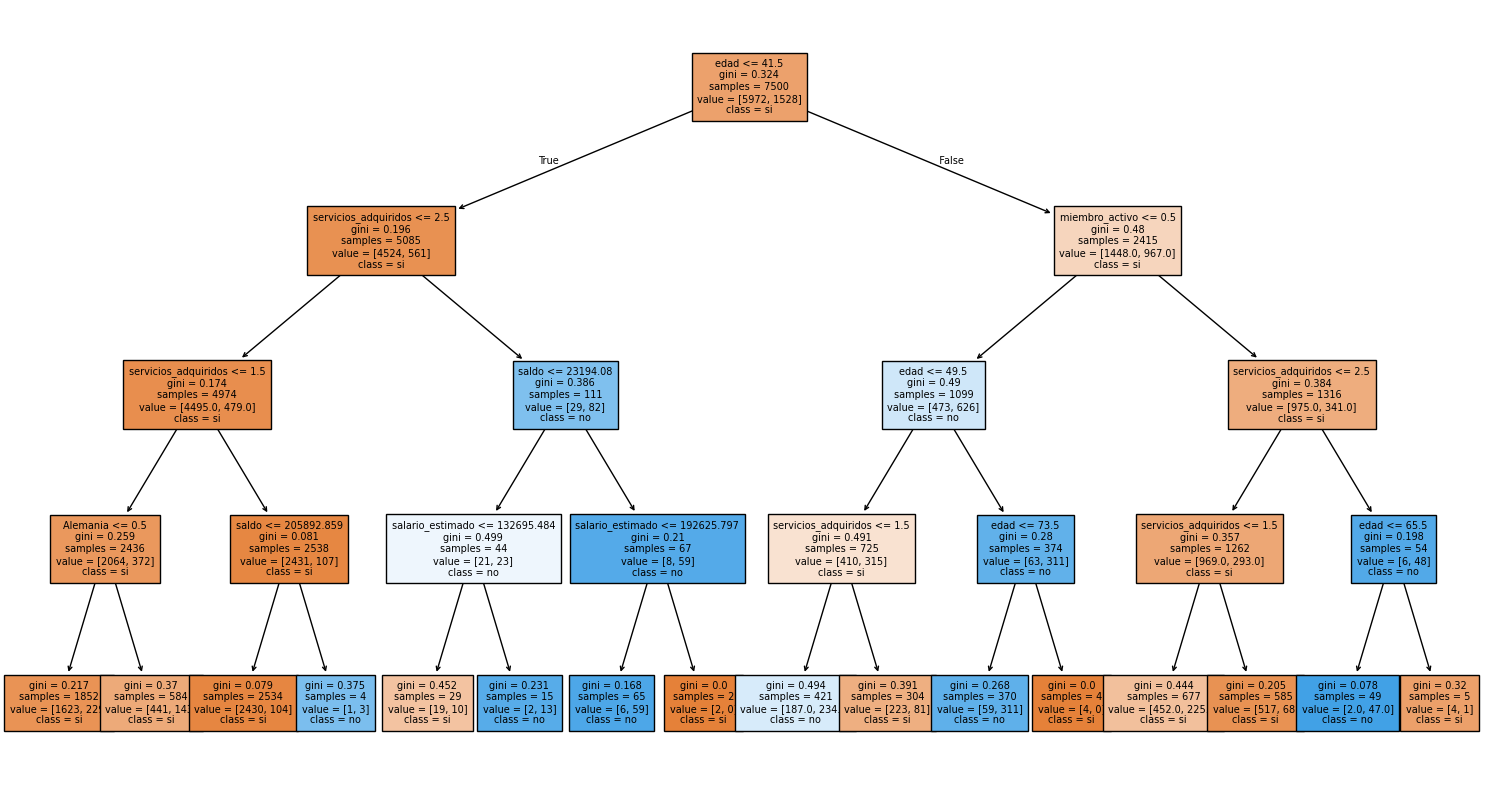

In [77]:
plt.figure(figsize=(19,10))
plot_tree(modelo_arbol2,filled=True,class_names=['si','no'],fontsize=7,feature_names=valores_columnas2);

In [78]:
modelo_arbol2.score(X_train2,y_train2)

0.8509333333333333

# 4. Selección de modelos

## Normalizando los datos

Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas **edad** y **salario**, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [81]:
pd.DataFrame(X_train_normalizado)

0    1    2    3    4    5    6    7         8         9         10  \
0    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.205882  0.065564  0.123734   
1    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.147059  0.045792  0.396527   
2    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.338235  0.076036  0.335022   
3    1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.573529  0.062866  0.315123   
4    0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.338235  0.148380  0.065847   
..   ...  ...  ...  ...  ...  ...  ...  ...       ...       ...       ...   
946  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.191176  0.044265  0.246382   
947  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.205882  0.028043  0.275687   
948  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.323529  0.042952  0.024964   
949  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.176471  0.042810  0.023878   
950  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.294118  0.248802  0.028220   

           11  
0    0.032258  
1    0.032258  
2    0.000000  
3    0.000000  
4    0.129032  
..        ...  
946  0.129032  
947  0.032258  
948  0.129032  
949  0.000000  
950  0.064516  

[951 rows x 12 columns]

## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier()

In [84]:
knn.fit(X_train_normalizado,y_train)

KNeighborsClassifier()

In [85]:
X_test_normalizado = normalizacion.transform(X_test)

In [86]:
knn.score(X_test_normalizado,y_test)

0.6876971608832808

## Escogiendo y serializando el mejor modelo

Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

In [87]:
lista = [('dummy',dummy,X_test),('de arbol',modelo_arbol,X_test),('knn',knn,X_test_normalizado)]
for i in lista:
  print(f'La exactitud del modelo {i[0]} {i[1].score(i[2],y_test)}')

La exactitud del modelo dummy 0.6025236593059937
La exactitud del modelo de arbol 0.722397476340694
La exactitud del modelo knn 0.6876971608832808


In [88]:
import pickle

In [89]:
with open('modelo_onehotencoder.pkl','wb') as archivo:
  pickle.dump(one_hot,archivo)

In [90]:
with open('modelo_champion.pkl','wb') as archivo:
  pickle.dump(modelo_arbol,archivo)

In [91]:
datos

edad    estado_civil escolaridad default  saldo prestatario  \
0       45      casado (a)    superior      no    242          no   
1       42      casado (a)  secundaria      no   1289          no   
2       23     soltero (a)    superior      no    363          no   
3       58  divorciado (a)    superior      no   1382          no   
4       50      casado (a)  secundaria      no   3357          no   
...    ...             ...         ...     ...    ...         ...   
1263    52     soltero (a)    superior      no     83          no   
1264    35     soltero (a)    superior      no   5958          no   
1265    30     soltero (a)    superior      no   -477          si   
1266    42      casado (a)    superior      no   2187          no   
1267    29     soltero (a)    superior      no     19          no   

      ultimo_contacto  ct_contactos adherencia_inversion  
0                 587             1                   si  
1                 250             4                   si  
2                  16            18                   no  
3                 700             1                   si  
4                 239             4                   si  
...               ...           ...                  ...  
1263             1223             6                   si  
1264              215             1                   si  
1265             1532             2                   si  
1266              525             3                   si  
1267              110             2                   si  

[1268 rows x 9 columns]

```python
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}
```

In [92]:
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}

In [93]:
nuevo_dato = pd.DataFrame(nuevo_dato)
nuevo_dato

edad estado_civil escolaridad default  saldo prestatario  ultimo_contacto  \
0    45  soltero (a)    superior      no  23040          no              800   

   ct_contactos  
0             4

In [94]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotencoder.pkl')
modelo_arbol = pd.read_pickle('/content/modelo_champion.pkl')

In [95]:
nuevo_dato = modelo_one_hot.transform(nuevo_dato)

In [96]:
print(modelo_arbol.predict(nuevo_dato)) # El nuevo cliente tiene un 0.722397476340694 de acierto ya que 1 representa el 100% de acierto con el modelo de machine learning

[1]


##**Desafío: hora de la práctica**

1.La normalización de datos es una tarea importante para mantener todos los valores numéricos en una misma escala y garantizar que todas las características tengan el mismo impacto en el modelo. En esta tarea, realiza la normalización de la base de datos usando el MinMaxScaler.

In [97]:
normalizacion2 = MinMaxScaler()
X_train_normalizado2 = normalizacion2.fit_transform(X_train2)

In [98]:
pd.DataFrame(X_train_normalizado2)

0    1    2    3      4         5    6         7         8    9    10  \
0     0.0  0.0  1.0  1.0  0.796  0.216216  0.8  0.000000  0.333333  1.0  0.0   
1     0.0  0.0  1.0  0.0  0.612  0.256757  0.2  0.000000  0.333333  0.0  1.0   
2     1.0  0.0  0.0  1.0  0.634  0.256757  0.5  0.386645  0.666667  1.0  0.0   
3     0.0  0.0  1.0  1.0  0.514  0.040541  0.0  0.000000  0.333333  1.0  0.0   
4     0.0  1.0  0.0  1.0  0.374  0.270270  0.6  0.594774  0.000000  0.0  1.0   
...   ...  ...  ...  ...    ...       ...  ...       ...       ...  ...  ...   
7495  1.0  0.0  0.0  0.0  0.590  0.391892  0.9  0.637940  0.000000  1.0  0.0   
7496  0.0  1.0  0.0  1.0  0.676  0.229730  0.6  0.000000  0.000000  1.0  0.0   
7497  0.0  1.0  0.0  1.0  0.646  0.229730  0.6  0.000000  0.333333  1.0  0.0   
7498  0.0  0.0  1.0  1.0  0.720  0.202703  0.2  0.000000  0.333333  1.0  0.0   
7499  0.0  0.0  1.0  0.0  0.680  0.202703  0.5  0.000000  0.333333  1.0  0.0   

            11  
0     0.267600  
1     0.338919  
2     0.890516  
3     0.580365  
4     0.738898  
...        ...  
7495  0.609048  
7496  0.127054  
7497  0.492884  
7498  0.364454  
7499  0.689975  

[7500 rows x 12 columns]

2.Con los datos normalizados, podemos utilizar el modelo KNN, que hace cálculos de distancia para encontrar los vecinos más cercanos. En esta actividad, crea un modelo KNN usando el KNeighborsClassifier con los datos normalizados y evalúa el rendimiento en los datos de prueba, también normalizados.

In [99]:
knn2 = KNeighborsClassifier()

In [100]:
knn2.fit(X_train_normalizado2,y_train2)

KNeighborsClassifier()

In [101]:
X_test_normalizado2 = normalizacion2.transform(X_test2)

In [102]:
knn2.score(X_test_normalizado2,y_test2)

0.8172

3.Después de construir los modelos, es el momento de comparar los resultados y seleccionar aquel que tiene el mejor rendimiento. En este desafío, evalúa la tasa de acierto de los modelos DummyClassifier, DecisionTreeClassifier y KNeighborsClassifier que fueron construidos en los otros desafíos utilizando el método score y, a continuación, almacena el modelo con mejor precisión en un archivo pickle. Los modelos de transformación también necesitan ser almacenados, que es el caso del OneHotEncoder y del MinMaxScaler, en caso de que el KNN tenga el mejor rendimiento.

In [103]:
lista2 = [('dummy2',dummy2,X_test2),('de arbol2',modelo_arbol2,X_test2),('knn2',knn2,X_test_normalizado2)]
for i in lista2:
  print(f'La exactitud del modelo {i[0]} {i[1].score(i[2],y_test2)}')

La exactitud del modelo dummy2 0.7964
La exactitud del modelo de arbol2 0.8464
La exactitud del modelo knn2 0.8172


In [104]:
with open('modelo_onehotencoder2.pkl','wb') as archivo:
  pickle.dump(transformador2,archivo)

In [105]:
with open('modelo_champion2.pkl','wb') as archivo:
  pickle.dump(modelo_arbol2,archivo)

4.Después de que el modelo está en producción, ya puede ser utilizado para clasificar nuevos datos. En este desafío, realiza la lectura de los archivos pickle de los modelos que fueron guardados en el desafío anterior y utiliza los modelos para hacer la predicción del siguiente registro:

In [106]:
datos_desafio

id_cliente  score_credito      pais sexo_biologico  edad  \
0       15634602            619   Francia          Mujer    42   
1       15647311            608    España          Mujer    41   
2       15619304            502   Francia          Mujer    42   
3       15701354            699   Francia          Mujer    39   
4       15737888            850    España          Mujer    43   
...          ...            ...       ...            ...   ...   
9995    15606229            771   Francia         Hombre    39   
9996    15569892            516   Francia         Hombre    35   
9997    15584532            709   Francia          Mujer    36   
9998    15682355            772  Alemania         Hombre    42   
9999    15628319            792   Francia          Mujer    28   

      años_de_cliente      saldo  servicios_adquiridos  tiene_tarjeta_credito  \
0                   2       0.00                     1                      1   
1                   1   83807.86                     1                      0   
2                   8  159660.80                     3                      1   
3                   1       0.00                     2                      0   
4                   2  125510.82                     1                      1   
...               ...        ...                   ...                    ...   
9995                5       0.00                     2                      1   
9996               10   57369.61                     1                      1   
9997                7       0.00                     1                      0   
9998                3   75075.31                     2                      1   
9999                4  130142.79                     1                      1   

      miembro_activo  salario_estimado  churn  
0                  1         101348.88      1  
1                  1         112542.58      0  
2                  0         113931.57      1  
3                  0          93826.63      0  
4                  1          79084.10      0  
...              ...               ...    ...  
9995               0          96270.64      0  
9996               1         101699.77      0  
9997               1          42085.58      1  
9998               0          92888.52      1  
9999               0          38190.78      0  

[10000 rows x 12 columns]

In [107]:
nuevo_dato2 = pd.DataFrame({
    'score_credito': [850],
    'pais':['Francia'],
    'sexo_biologico':['Hombre'],
    'edad': [27],
    'años_de_cliente': [3],
    'saldo': [56000],
    'servicios_adquiridos': [1],
    'tiene_tarjeta_credito': [1],
    'miembro_activo': [1], # Corrected column name: removed the space
    'salario_estimado': [85270.00]
})

In [108]:
nuevo_dato2 = pd.DataFrame(nuevo_dato2)
nuevo_dato2

score_credito     pais sexo_biologico  edad  años_de_cliente  saldo  \
0            850  Francia         Hombre    27                3  56000   

   servicios_adquiridos  tiene_tarjeta_credito  miembro_activo  \
0                     1                      1               1   

   salario_estimado  
0           85270.0

In [109]:
modelo_one_hot2 = pd.read_pickle('/content/modelo_onehotencoder2.pkl')
modelo_arbol2 = pd.read_pickle('/content/modelo_champion2.pkl')

In [110]:
nuevo_dato2 = modelo_one_hot2.transform(nuevo_dato2)

In [111]:
print(modelo_arbol.predict(nuevo_dato)) # El nuevo cliente tiene un 0.8464 de acierto ya que 1 representa el 100% de acierto con el modelo de machine learning

[1]
